In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import required libraries
from PIL import Image
import io

In [21]:
from PIL import Image
import binascii

# Open the JPG image
image_path = r"C:\Users\deepa\Downloads\Screenshot 2024-10-07 0729171234.PNG"
image = Image.open(image_path)

# Convert the image to a byte array
with open(image_path, 'rb') as file:
    image_bytes = file.read()

# Convert bytes to a binary number
binary_data = bin(int(binascii.hexlify(image_bytes), 16))

# Print or store the binary data as needed
print("Binary data of the image:")
print(binary_data[:50])
# sum(binary_data[5:10])
len(binary_data)

Binary data of the image:
0b100010010101000001001110010001110000110100001010


129802

In [23]:
from PIL import Image

# Open the image
image_path = r"C:\Users\deepa\Downloads\Screenshot 2024-10-07 0729171234.PNG"
image = Image.open(image_path)

# Convert the image to RGB format (if not already in that format)
image = image.convert("RGB")

# Get the image dimensions
width, height = image.size

# Iterate over each pixel and convert RGB values to binary
binary_pixels = []

for y in range(height):
    for x in range(width):
        # Get the RGB values of the pixel
        r, g, b = image.getpixel((x, y))
        
        # Convert RGB values to binary format
        r_binary = format(r, '08b')
        g_binary = format(g, '08b')
        b_binary = format(b, '08b')
        
        # Store the binary representation of the pixel
        binary_pixels.append((r_binary, g_binary, b_binary))

# Print binary data for the first 10 pixels
print("Binary representation of the first 10 pixels:")
for i, pixel in enumerate(binary_pixels[:10]):
    print(f"Pixel {i+1}: R={pixel[0]}, G={pixel[1]}, B={pixel[2]}")

print(width,height)

Binary representation of the first 10 pixels:
Pixel 1: R=11111010, G=11111010, B=11110010
Pixel 2: R=11111011, G=11111001, B=11110010
Pixel 3: R=11111110, G=11110111, B=11110101
Pixel 4: R=11111111, G=11110101, B=11111000
Pixel 5: R=11111111, G=11110110, B=11111000
Pixel 6: R=11111101, G=11110111, B=11110111
Pixel 7: R=11111010, G=11111001, B=11110110
Pixel 8: R=11110101, G=11111100, B=11110100
Pixel 9: R=11110010, G=11111110, B=11110010
Pixel 10: R=11101111, G=11111111, B=11101101
31 37


[[249 249 249 ... 247 246 245]
 [249 249 249 ... 199 233 246]
 [249 249 249 ...  79 152 217]
 ...
 [197 142 121 ... 247 245 246]
 [235 222 215 ... 249 248 248]
 [243 247 247 ... 247 247 246]]


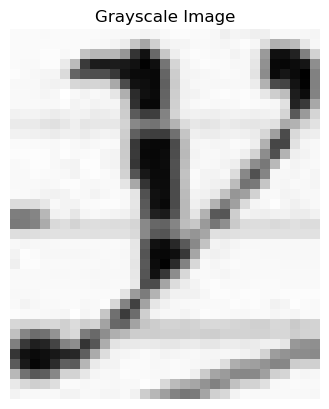

Binary representation of the first 10 pixels in the grayscale image:
Pixel 1: 11111001
Pixel 2: 11111001
Pixel 3: 11111001
Pixel 4: 11111000
Pixel 5: 11111001
Pixel 6: 11111001
Pixel 7: 11111001
Pixel 8: 11111001
Pixel 9: 11111001
Pixel 10: 11111000
31 37
1147


In [34]:
from PIL import Image

# Open the grayscale image
image_path = r"C:\Users\deepa\Downloads\Screenshot 2024-10-07 0729171234.PNG"
image = Image.open(image_path)

# Ensure the image is in grayscale mode ('L' mode in Pillow)
image = image.convert("L")

gray_array = np.array(gray_image)
print(gray_array)

plt.imshow(image, cmap="gray")
plt.axis("off")  # Turn off the axis
plt.title("Grayscale Image")
plt.show()

# Get the image dimensions
width, height = image.size

# Iterate over each pixel and convert to binary
binary_pixels = []

for y in range(height):
    for x in range(width):
        # Get the pixel value (0-255)
        pixel_value = image.getpixel((x, y))
#         print(pixel_value)
        
        # Convert the pixel value to binary (8-bit)
        pixel_binary = format(pixel_value, '08b')
        
        # Store the binary representation of the pixel
        binary_pixels.append(pixel_binary)

# Print binary data for the first 10 pixels
print("Binary representation of the first 10 pixels in the grayscale image:")
for i, pixel in enumerate(binary_pixels[:10]):
    print(f"Pixel {i+1}: {pixel}")
    
print(width,height)
print(width*height)

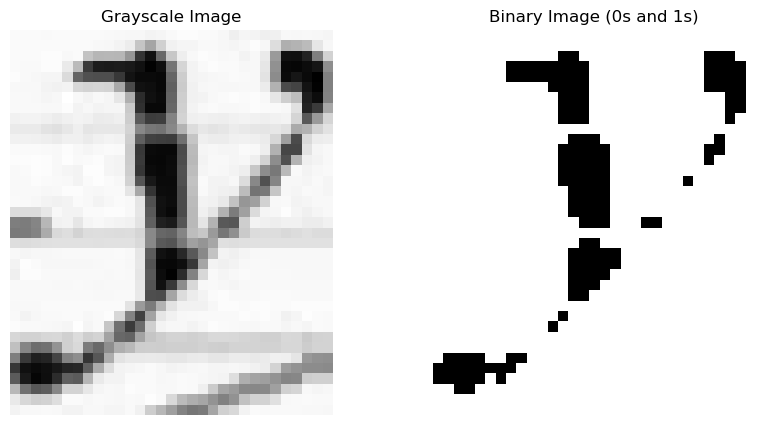

In [31]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the grayscale image
image_path = r"C:\Users\deepa\Downloads\Screenshot 2024-10-07 0729171234.PNG"
image = Image.open(image_path)

# Convert to grayscale
gray_image = image.convert("L")

# Convert grayscale image to numpy array
gray_array = np.array(gray_image)

# Define the threshold
threshold = 128

# Convert each pixel to 0 or 1 based on the threshold
binary_array = (gray_array >= threshold).astype(int)

# Convert the binary array back to an image
binary_image = Image.fromarray((binary_array * 255).astype(np.uint8))

# Display the original and binary images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap="gray")
plt.axis("off")
plt.title("Binary Image (0s and 1s)")

plt.show()

# Web Scraping

In [79]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
import os
import base64
import re
import selenium
from urllib.parse import urlparse



def save_data_url(data_url, save_directory='downloaded_images', default_filename='image'):
    """
    Saves a Data URL as an image file.

    Parameters:
        data_url (str): The Data URL to decode and save.
        save_directory (str): Directory where the image will be saved.
        default_filename (str): Base name for the saved image file.

    Returns:
        str: Path to the saved image file.
    """
    # Regular expression to parse Data URLs
    data_url_pattern = re.compile(r'data:(?P<mediatype>[\w/+-]+(?:\.[\w/+.-]+)*);base64,(?P<data>.+)')

    match = data_url_pattern.match(data_url)
    if not match:
        raise ValueError("Invalid Data URL format.")

    mediatype = match.group('mediatype')
    data = match.group('data')

    # Determine file extension from MIME type
    mime_to_extension = {
        'image/jpg': '.jpg',
        'image/png': '.png',
        'image/gif': '.gif',
        'image/bmp': '.bmp',
        'image/svg+xml': '.svg',
        'image/webp': '.webp',
        # Add more MIME types and extensions as needed
    }

    file_extension = mime_to_extension.get(mediatype, '')  # Default to no extension if unknown
    if not file_extension:
        print(f"Warning: Unrecognized MIME type '{mediatype}'. Saving without extension.")

    # Decode the base64 data
    try:
        image_data = base64.b64decode(data)
    except base64.binascii.Error as e:
        raise ValueError("Error decoding base64 data.") from e

    # Ensure the save directory exists
    os.makedirs(save_directory, exist_ok=True)

    # Create a unique filename
    filename = f"{default_filename}{file_extension}"
    save_path = os.path.join(save_directory, filename)

    # Handle filename conflicts by appending a number
    counter = 1
    while os.path.exists(save_path):
        filename = f"{default_filename}_{counter}{file_extension}"
        save_path = os.path.join(save_directory, filename)
        counter += 1

    # Write the binary data to the file
    with open(save_path, 'wb') as f:
        f.write(image_data)

    print(f"Image successfully saved to {save_path}")
    return save_path

if __name__ == "__main__":
        # Set up the web driver (adjust the path to your downloaded chromedriver)
    driver_path = r"C:\Users\deepa\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe"  # Update this with your path

    chrome_options = webdriver.ChromeOptions()
#     chrome_options.add_argument('--headless')  # Run Chrome in headless mode
#     chrome_options.add_argument('--disable-gpu')  # Disable GPU acceleration
#     chrome_options.add_argument('--no-sandbox')  # Bypass OS security model
#     chrome_options.add_argument('--log-level=3')  # Suppress logging


    driver = webdriver.Chrome(executable_path=driver_path,options=chrome_options)


    # Open the target webpage
    url = 'https://electoralsearch.eci.gov.in/'  # Replace with the URL of the page containing the image
    driver.get(url)
    
    for i in range(5001):
    # Locate the image element (update the selector as per the website structure)
        driver.implicitly_wait(2)
        driver.find_element(By.XPATH, '//*[@id="root"]/div[2]/div/div[3]/div[3]/div[1]/div/div[1]/img').click()
        image_element = driver.find_element(By.CLASS_NAME, 'captcha-div')  # You can also use a more specific selector
        image_element1 = image_element.find_element(By.TAG_NAME, 'img')

        # Get the image source URL
        image_url = image_element1.get_attribute('src')
        
        # Example Data URL (a small red dot PNG)
        data_url = image_url

        try:
            saved_image_path = save_data_url(
                data_url,
                save_directory='downloaded_images',
                default_filename='captcha'
            )
        except ValueError as e:
            print(f"Failed to save image: {e}")

C:\Users\deepa\AppData\Local\Temp\ipykernel_7376\3839397319.py:87: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path,options=chrome_options)


Image successfully saved to downloaded_images\captcha.jpg
Image successfully saved to downloaded_images\captcha_1.jpg
Image successfully saved to downloaded_images\captcha_2.jpg
Image successfully saved to downloaded_images\captcha_3.jpg
Image successfully saved to downloaded_images\captcha_4.jpg
Image successfully saved to downloaded_images\captcha_5.jpg
Image successfully saved to downloaded_images\captcha_6.jpg
Image successfully saved to downloaded_images\captcha_7.jpg
Image successfully saved to downloaded_images\captcha_8.jpg
Image successfully saved to downloaded_images\captcha_9.jpg
Image successfully saved to downloaded_images\captcha_10.jpg
Image successfully saved to downloaded_images\captcha_11.jpg
Image successfully saved to downloaded_images\captcha_12.jpg
Image successfully saved to downloaded_images\captcha_13.jpg
Image successfully saved to downloaded_images\captcha_14.jpg
Image successfully saved to downloaded_images\captcha_15.jpg
Image successfully saved to download

Image successfully saved to downloaded_images\captcha_135.jpg
Image successfully saved to downloaded_images\captcha_136.jpg
Image successfully saved to downloaded_images\captcha_137.jpg
Image successfully saved to downloaded_images\captcha_138.jpg
Image successfully saved to downloaded_images\captcha_139.jpg
Image successfully saved to downloaded_images\captcha_140.jpg
Image successfully saved to downloaded_images\captcha_141.jpg
Image successfully saved to downloaded_images\captcha_142.jpg
Image successfully saved to downloaded_images\captcha_143.jpg
Image successfully saved to downloaded_images\captcha_144.jpg
Image successfully saved to downloaded_images\captcha_145.jpg
Image successfully saved to downloaded_images\captcha_146.jpg
Image successfully saved to downloaded_images\captcha_147.jpg
Image successfully saved to downloaded_images\captcha_148.jpg
Image successfully saved to downloaded_images\captcha_149.jpg
Image successfully saved to downloaded_images\captcha_150.jpg
Image su

Image successfully saved to downloaded_images\captcha_269.jpg
Image successfully saved to downloaded_images\captcha_270.jpg
Image successfully saved to downloaded_images\captcha_271.jpg
Image successfully saved to downloaded_images\captcha_272.jpg
Image successfully saved to downloaded_images\captcha_273.jpg
Image successfully saved to downloaded_images\captcha_274.jpg
Image successfully saved to downloaded_images\captcha_275.jpg
Image successfully saved to downloaded_images\captcha_276.jpg
Image successfully saved to downloaded_images\captcha_277.jpg
Image successfully saved to downloaded_images\captcha_278.jpg
Image successfully saved to downloaded_images\captcha_279.jpg
Image successfully saved to downloaded_images\captcha_280.jpg
Image successfully saved to downloaded_images\captcha_281.jpg
Image successfully saved to downloaded_images\captcha_282.jpg
Image successfully saved to downloaded_images\captcha_283.jpg
Image successfully saved to downloaded_images\captcha_284.jpg
Image su

Image successfully saved to downloaded_images\captcha_403.jpg
Image successfully saved to downloaded_images\captcha_404.jpg
Image successfully saved to downloaded_images\captcha_405.jpg
Image successfully saved to downloaded_images\captcha_406.jpg
Image successfully saved to downloaded_images\captcha_407.jpg
Image successfully saved to downloaded_images\captcha_408.jpg
Image successfully saved to downloaded_images\captcha_409.jpg
Image successfully saved to downloaded_images\captcha_410.jpg
Image successfully saved to downloaded_images\captcha_411.jpg
Image successfully saved to downloaded_images\captcha_412.jpg
Image successfully saved to downloaded_images\captcha_413.jpg
Image successfully saved to downloaded_images\captcha_414.jpg
Image successfully saved to downloaded_images\captcha_415.jpg
Image successfully saved to downloaded_images\captcha_416.jpg
Image successfully saved to downloaded_images\captcha_417.jpg
Image successfully saved to downloaded_images\captcha_418.jpg
Image su

Image successfully saved to downloaded_images\captcha_538.jpg
Image successfully saved to downloaded_images\captcha_539.jpg
Image successfully saved to downloaded_images\captcha_540.jpg
Image successfully saved to downloaded_images\captcha_541.jpg
Image successfully saved to downloaded_images\captcha_542.jpg
Image successfully saved to downloaded_images\captcha_543.jpg
Image successfully saved to downloaded_images\captcha_544.jpg
Image successfully saved to downloaded_images\captcha_545.jpg
Image successfully saved to downloaded_images\captcha_546.jpg
Image successfully saved to downloaded_images\captcha_547.jpg
Image successfully saved to downloaded_images\captcha_548.jpg
Image successfully saved to downloaded_images\captcha_549.jpg
Image successfully saved to downloaded_images\captcha_550.jpg
Image successfully saved to downloaded_images\captcha_551.jpg
Image successfully saved to downloaded_images\captcha_552.jpg
Image successfully saved to downloaded_images\captcha_553.jpg
Image su

Image successfully saved to downloaded_images\captcha_671.jpg
Image successfully saved to downloaded_images\captcha_672.jpg
Image successfully saved to downloaded_images\captcha_673.jpg
Image successfully saved to downloaded_images\captcha_674.jpg
Image successfully saved to downloaded_images\captcha_675.jpg
Image successfully saved to downloaded_images\captcha_676.jpg
Image successfully saved to downloaded_images\captcha_677.jpg
Image successfully saved to downloaded_images\captcha_678.jpg
Image successfully saved to downloaded_images\captcha_679.jpg
Image successfully saved to downloaded_images\captcha_680.jpg
Image successfully saved to downloaded_images\captcha_681.jpg
Image successfully saved to downloaded_images\captcha_682.jpg
Image successfully saved to downloaded_images\captcha_683.jpg
Image successfully saved to downloaded_images\captcha_684.jpg
Image successfully saved to downloaded_images\captcha_685.jpg
Image successfully saved to downloaded_images\captcha_686.jpg
Image su

Image successfully saved to downloaded_images\captcha_806.jpg
Image successfully saved to downloaded_images\captcha_807.jpg
Image successfully saved to downloaded_images\captcha_808.jpg
Image successfully saved to downloaded_images\captcha_809.jpg
Image successfully saved to downloaded_images\captcha_810.jpg
Image successfully saved to downloaded_images\captcha_811.jpg
Image successfully saved to downloaded_images\captcha_812.jpg
Image successfully saved to downloaded_images\captcha_813.jpg
Image successfully saved to downloaded_images\captcha_814.jpg
Image successfully saved to downloaded_images\captcha_815.jpg
Image successfully saved to downloaded_images\captcha_816.jpg
Image successfully saved to downloaded_images\captcha_817.jpg
Image successfully saved to downloaded_images\captcha_818.jpg
Image successfully saved to downloaded_images\captcha_819.jpg
Image successfully saved to downloaded_images\captcha_820.jpg
Image successfully saved to downloaded_images\captcha_821.jpg
Image su

Image successfully saved to downloaded_images\captcha_939.jpg
Image successfully saved to downloaded_images\captcha_940.jpg
Image successfully saved to downloaded_images\captcha_941.jpg
Image successfully saved to downloaded_images\captcha_942.jpg
Image successfully saved to downloaded_images\captcha_943.jpg
Image successfully saved to downloaded_images\captcha_944.jpg
Image successfully saved to downloaded_images\captcha_945.jpg
Image successfully saved to downloaded_images\captcha_946.jpg
Image successfully saved to downloaded_images\captcha_947.jpg
Image successfully saved to downloaded_images\captcha_948.jpg
Image successfully saved to downloaded_images\captcha_949.jpg
Image successfully saved to downloaded_images\captcha_950.jpg
Image successfully saved to downloaded_images\captcha_951.jpg
Image successfully saved to downloaded_images\captcha_952.jpg
Image successfully saved to downloaded_images\captcha_953.jpg
Image successfully saved to downloaded_images\captcha_954.jpg
Image su

Image successfully saved to downloaded_images\captcha_1072.jpg
Image successfully saved to downloaded_images\captcha_1073.jpg
Image successfully saved to downloaded_images\captcha_1074.jpg
Image successfully saved to downloaded_images\captcha_1075.jpg
Image successfully saved to downloaded_images\captcha_1076.jpg
Image successfully saved to downloaded_images\captcha_1077.jpg
Image successfully saved to downloaded_images\captcha_1078.jpg
Image successfully saved to downloaded_images\captcha_1079.jpg
Image successfully saved to downloaded_images\captcha_1080.jpg
Image successfully saved to downloaded_images\captcha_1081.jpg
Image successfully saved to downloaded_images\captcha_1082.jpg
Image successfully saved to downloaded_images\captcha_1083.jpg
Image successfully saved to downloaded_images\captcha_1084.jpg
Image successfully saved to downloaded_images\captcha_1085.jpg
Image successfully saved to downloaded_images\captcha_1086.jpg
Image successfully saved to downloaded_images\captcha_1

Image successfully saved to downloaded_images\captcha_1203.jpg
Image successfully saved to downloaded_images\captcha_1204.jpg
Image successfully saved to downloaded_images\captcha_1205.jpg
Image successfully saved to downloaded_images\captcha_1206.jpg
Image successfully saved to downloaded_images\captcha_1207.jpg
Image successfully saved to downloaded_images\captcha_1208.jpg
Image successfully saved to downloaded_images\captcha_1209.jpg
Image successfully saved to downloaded_images\captcha_1210.jpg
Image successfully saved to downloaded_images\captcha_1211.jpg
Image successfully saved to downloaded_images\captcha_1212.jpg
Image successfully saved to downloaded_images\captcha_1213.jpg
Image successfully saved to downloaded_images\captcha_1214.jpg
Image successfully saved to downloaded_images\captcha_1215.jpg
Image successfully saved to downloaded_images\captcha_1216.jpg
Image successfully saved to downloaded_images\captcha_1217.jpg
Image successfully saved to downloaded_images\captcha_1

Image successfully saved to downloaded_images\captcha_1335.jpg
Image successfully saved to downloaded_images\captcha_1336.jpg
Image successfully saved to downloaded_images\captcha_1337.jpg
Image successfully saved to downloaded_images\captcha_1338.jpg
Image successfully saved to downloaded_images\captcha_1339.jpg
Image successfully saved to downloaded_images\captcha_1340.jpg
Image successfully saved to downloaded_images\captcha_1341.jpg
Image successfully saved to downloaded_images\captcha_1342.jpg
Image successfully saved to downloaded_images\captcha_1343.jpg
Image successfully saved to downloaded_images\captcha_1344.jpg
Image successfully saved to downloaded_images\captcha_1345.jpg
Image successfully saved to downloaded_images\captcha_1346.jpg
Image successfully saved to downloaded_images\captcha_1347.jpg
Image successfully saved to downloaded_images\captcha_1348.jpg
Image successfully saved to downloaded_images\captcha_1349.jpg
Image successfully saved to downloaded_images\captcha_1

Image successfully saved to downloaded_images\captcha_1467.jpg
Image successfully saved to downloaded_images\captcha_1468.jpg
Image successfully saved to downloaded_images\captcha_1469.jpg
Image successfully saved to downloaded_images\captcha_1470.jpg
Image successfully saved to downloaded_images\captcha_1471.jpg
Image successfully saved to downloaded_images\captcha_1472.jpg
Image successfully saved to downloaded_images\captcha_1473.jpg
Image successfully saved to downloaded_images\captcha_1474.jpg
Image successfully saved to downloaded_images\captcha_1475.jpg
Image successfully saved to downloaded_images\captcha_1476.jpg
Image successfully saved to downloaded_images\captcha_1477.jpg
Image successfully saved to downloaded_images\captcha_1478.jpg
Image successfully saved to downloaded_images\captcha_1479.jpg
Image successfully saved to downloaded_images\captcha_1480.jpg
Image successfully saved to downloaded_images\captcha_1481.jpg
Image successfully saved to downloaded_images\captcha_1

Image successfully saved to downloaded_images\captcha_1599.jpg
Image successfully saved to downloaded_images\captcha_1600.jpg
Image successfully saved to downloaded_images\captcha_1601.jpg
Image successfully saved to downloaded_images\captcha_1602.jpg
Image successfully saved to downloaded_images\captcha_1603.jpg
Image successfully saved to downloaded_images\captcha_1604.jpg
Image successfully saved to downloaded_images\captcha_1605.jpg
Image successfully saved to downloaded_images\captcha_1606.jpg
Image successfully saved to downloaded_images\captcha_1607.jpg
Image successfully saved to downloaded_images\captcha_1608.jpg
Image successfully saved to downloaded_images\captcha_1609.jpg
Image successfully saved to downloaded_images\captcha_1610.jpg
Image successfully saved to downloaded_images\captcha_1611.jpg
Image successfully saved to downloaded_images\captcha_1612.jpg
Image successfully saved to downloaded_images\captcha_1613.jpg
Image successfully saved to downloaded_images\captcha_1

Image successfully saved to downloaded_images\captcha_1731.jpg
Image successfully saved to downloaded_images\captcha_1732.jpg
Image successfully saved to downloaded_images\captcha_1733.jpg
Image successfully saved to downloaded_images\captcha_1734.jpg
Image successfully saved to downloaded_images\captcha_1735.jpg
Image successfully saved to downloaded_images\captcha_1736.jpg
Image successfully saved to downloaded_images\captcha_1737.jpg
Image successfully saved to downloaded_images\captcha_1738.jpg
Image successfully saved to downloaded_images\captcha_1739.jpg
Image successfully saved to downloaded_images\captcha_1740.jpg
Image successfully saved to downloaded_images\captcha_1741.jpg
Image successfully saved to downloaded_images\captcha_1742.jpg
Image successfully saved to downloaded_images\captcha_1743.jpg
Image successfully saved to downloaded_images\captcha_1744.jpg
Image successfully saved to downloaded_images\captcha_1745.jpg
Image successfully saved to downloaded_images\captcha_1

Image successfully saved to downloaded_images\captcha_1863.jpg
Image successfully saved to downloaded_images\captcha_1864.jpg
Image successfully saved to downloaded_images\captcha_1865.jpg
Image successfully saved to downloaded_images\captcha_1866.jpg
Image successfully saved to downloaded_images\captcha_1867.jpg
Image successfully saved to downloaded_images\captcha_1868.jpg
Image successfully saved to downloaded_images\captcha_1869.jpg
Image successfully saved to downloaded_images\captcha_1870.jpg
Image successfully saved to downloaded_images\captcha_1871.jpg
Image successfully saved to downloaded_images\captcha_1872.jpg
Image successfully saved to downloaded_images\captcha_1873.jpg
Image successfully saved to downloaded_images\captcha_1874.jpg
Image successfully saved to downloaded_images\captcha_1875.jpg
Image successfully saved to downloaded_images\captcha_1876.jpg
Image successfully saved to downloaded_images\captcha_1877.jpg
Image successfully saved to downloaded_images\captcha_1

Image successfully saved to downloaded_images\captcha_1995.jpg
Image successfully saved to downloaded_images\captcha_1996.jpg
Image successfully saved to downloaded_images\captcha_1997.jpg
Image successfully saved to downloaded_images\captcha_1998.jpg
Image successfully saved to downloaded_images\captcha_1999.jpg
Image successfully saved to downloaded_images\captcha_2000.jpg
Image successfully saved to downloaded_images\captcha_2001.jpg
Image successfully saved to downloaded_images\captcha_2002.jpg
Image successfully saved to downloaded_images\captcha_2003.jpg
Image successfully saved to downloaded_images\captcha_2004.jpg
Image successfully saved to downloaded_images\captcha_2005.jpg
Image successfully saved to downloaded_images\captcha_2006.jpg
Image successfully saved to downloaded_images\captcha_2007.jpg
Image successfully saved to downloaded_images\captcha_2008.jpg
Image successfully saved to downloaded_images\captcha_2009.jpg
Image successfully saved to downloaded_images\captcha_2

Image successfully saved to downloaded_images\captcha_2127.jpg
Image successfully saved to downloaded_images\captcha_2128.jpg
Image successfully saved to downloaded_images\captcha_2129.jpg
Image successfully saved to downloaded_images\captcha_2130.jpg
Image successfully saved to downloaded_images\captcha_2131.jpg
Image successfully saved to downloaded_images\captcha_2132.jpg
Image successfully saved to downloaded_images\captcha_2133.jpg
Image successfully saved to downloaded_images\captcha_2134.jpg
Image successfully saved to downloaded_images\captcha_2135.jpg
Image successfully saved to downloaded_images\captcha_2136.jpg
Image successfully saved to downloaded_images\captcha_2137.jpg
Image successfully saved to downloaded_images\captcha_2138.jpg
Image successfully saved to downloaded_images\captcha_2139.jpg
Image successfully saved to downloaded_images\captcha_2140.jpg
Image successfully saved to downloaded_images\captcha_2141.jpg
Image successfully saved to downloaded_images\captcha_2

Image successfully saved to downloaded_images\captcha_2259.jpg
Image successfully saved to downloaded_images\captcha_2260.jpg
Image successfully saved to downloaded_images\captcha_2261.jpg
Image successfully saved to downloaded_images\captcha_2262.jpg
Image successfully saved to downloaded_images\captcha_2263.jpg
Image successfully saved to downloaded_images\captcha_2264.jpg
Image successfully saved to downloaded_images\captcha_2265.jpg
Image successfully saved to downloaded_images\captcha_2266.jpg
Image successfully saved to downloaded_images\captcha_2267.jpg
Image successfully saved to downloaded_images\captcha_2268.jpg
Image successfully saved to downloaded_images\captcha_2269.jpg
Image successfully saved to downloaded_images\captcha_2270.jpg
Image successfully saved to downloaded_images\captcha_2271.jpg
Image successfully saved to downloaded_images\captcha_2272.jpg
Image successfully saved to downloaded_images\captcha_2273.jpg
Image successfully saved to downloaded_images\captcha_2

Image successfully saved to downloaded_images\captcha_2390.jpg
Image successfully saved to downloaded_images\captcha_2391.jpg
Image successfully saved to downloaded_images\captcha_2392.jpg
Image successfully saved to downloaded_images\captcha_2393.jpg
Image successfully saved to downloaded_images\captcha_2394.jpg
Image successfully saved to downloaded_images\captcha_2395.jpg
Image successfully saved to downloaded_images\captcha_2396.jpg
Image successfully saved to downloaded_images\captcha_2397.jpg
Image successfully saved to downloaded_images\captcha_2398.jpg
Image successfully saved to downloaded_images\captcha_2399.jpg
Image successfully saved to downloaded_images\captcha_2400.jpg
Image successfully saved to downloaded_images\captcha_2401.jpg
Image successfully saved to downloaded_images\captcha_2402.jpg
Image successfully saved to downloaded_images\captcha_2403.jpg
Image successfully saved to downloaded_images\captcha_2404.jpg
Image successfully saved to downloaded_images\captcha_2

Image successfully saved to downloaded_images\captcha_2521.jpg
Image successfully saved to downloaded_images\captcha_2522.jpg
Image successfully saved to downloaded_images\captcha_2523.jpg
Image successfully saved to downloaded_images\captcha_2524.jpg
Image successfully saved to downloaded_images\captcha_2525.jpg
Image successfully saved to downloaded_images\captcha_2526.jpg
Image successfully saved to downloaded_images\captcha_2527.jpg
Image successfully saved to downloaded_images\captcha_2528.jpg
Image successfully saved to downloaded_images\captcha_2529.jpg
Image successfully saved to downloaded_images\captcha_2530.jpg
Image successfully saved to downloaded_images\captcha_2531.jpg
Image successfully saved to downloaded_images\captcha_2532.jpg
Image successfully saved to downloaded_images\captcha_2533.jpg
Image successfully saved to downloaded_images\captcha_2534.jpg
Image successfully saved to downloaded_images\captcha_2535.jpg
Image successfully saved to downloaded_images\captcha_2

Image successfully saved to downloaded_images\captcha_2653.jpg
Image successfully saved to downloaded_images\captcha_2654.jpg
Image successfully saved to downloaded_images\captcha_2655.jpg
Image successfully saved to downloaded_images\captcha_2656.jpg
Image successfully saved to downloaded_images\captcha_2657.jpg
Image successfully saved to downloaded_images\captcha_2658.jpg
Image successfully saved to downloaded_images\captcha_2659.jpg
Image successfully saved to downloaded_images\captcha_2660.jpg
Image successfully saved to downloaded_images\captcha_2661.jpg
Image successfully saved to downloaded_images\captcha_2662.jpg
Image successfully saved to downloaded_images\captcha_2663.jpg
Image successfully saved to downloaded_images\captcha_2664.jpg
Image successfully saved to downloaded_images\captcha_2665.jpg
Image successfully saved to downloaded_images\captcha_2666.jpg
Image successfully saved to downloaded_images\captcha_2667.jpg
Image successfully saved to downloaded_images\captcha_2

Image successfully saved to downloaded_images\captcha_2785.jpg
Image successfully saved to downloaded_images\captcha_2786.jpg
Image successfully saved to downloaded_images\captcha_2787.jpg
Image successfully saved to downloaded_images\captcha_2788.jpg
Image successfully saved to downloaded_images\captcha_2789.jpg
Image successfully saved to downloaded_images\captcha_2790.jpg
Image successfully saved to downloaded_images\captcha_2791.jpg
Image successfully saved to downloaded_images\captcha_2792.jpg
Image successfully saved to downloaded_images\captcha_2793.jpg
Image successfully saved to downloaded_images\captcha_2794.jpg
Image successfully saved to downloaded_images\captcha_2795.jpg
Image successfully saved to downloaded_images\captcha_2796.jpg
Image successfully saved to downloaded_images\captcha_2797.jpg
Image successfully saved to downloaded_images\captcha_2798.jpg
Image successfully saved to downloaded_images\captcha_2799.jpg
Image successfully saved to downloaded_images\captcha_2

Image successfully saved to downloaded_images\captcha_2916.jpg
Image successfully saved to downloaded_images\captcha_2917.jpg
Image successfully saved to downloaded_images\captcha_2918.jpg
Image successfully saved to downloaded_images\captcha_2919.jpg
Image successfully saved to downloaded_images\captcha_2920.jpg
Image successfully saved to downloaded_images\captcha_2921.jpg
Image successfully saved to downloaded_images\captcha_2922.jpg
Image successfully saved to downloaded_images\captcha_2923.jpg
Image successfully saved to downloaded_images\captcha_2924.jpg
Image successfully saved to downloaded_images\captcha_2925.jpg
Image successfully saved to downloaded_images\captcha_2926.jpg
Image successfully saved to downloaded_images\captcha_2927.jpg
Image successfully saved to downloaded_images\captcha_2928.jpg
Image successfully saved to downloaded_images\captcha_2929.jpg
Image successfully saved to downloaded_images\captcha_2930.jpg
Image successfully saved to downloaded_images\captcha_2

Image successfully saved to downloaded_images\captcha_3047.jpg
Image successfully saved to downloaded_images\captcha_3048.jpg
Image successfully saved to downloaded_images\captcha_3049.jpg
Image successfully saved to downloaded_images\captcha_3050.jpg
Image successfully saved to downloaded_images\captcha_3051.jpg
Image successfully saved to downloaded_images\captcha_3052.jpg
Image successfully saved to downloaded_images\captcha_3053.jpg
Image successfully saved to downloaded_images\captcha_3054.jpg
Image successfully saved to downloaded_images\captcha_3055.jpg
Image successfully saved to downloaded_images\captcha_3056.jpg
Image successfully saved to downloaded_images\captcha_3057.jpg
Image successfully saved to downloaded_images\captcha_3058.jpg
Image successfully saved to downloaded_images\captcha_3059.jpg
Image successfully saved to downloaded_images\captcha_3060.jpg
Image successfully saved to downloaded_images\captcha_3061.jpg
Image successfully saved to downloaded_images\captcha_3

Image successfully saved to downloaded_images\captcha_3178.jpg
Image successfully saved to downloaded_images\captcha_3179.jpg
Image successfully saved to downloaded_images\captcha_3180.jpg
Image successfully saved to downloaded_images\captcha_3181.jpg
Image successfully saved to downloaded_images\captcha_3182.jpg
Image successfully saved to downloaded_images\captcha_3183.jpg
Image successfully saved to downloaded_images\captcha_3184.jpg
Image successfully saved to downloaded_images\captcha_3185.jpg
Image successfully saved to downloaded_images\captcha_3186.jpg
Image successfully saved to downloaded_images\captcha_3187.jpg
Image successfully saved to downloaded_images\captcha_3188.jpg
Image successfully saved to downloaded_images\captcha_3189.jpg
Image successfully saved to downloaded_images\captcha_3190.jpg
Image successfully saved to downloaded_images\captcha_3191.jpg
Image successfully saved to downloaded_images\captcha_3192.jpg
Image successfully saved to downloaded_images\captcha_3

Image successfully saved to downloaded_images\captcha_3309.jpg
Image successfully saved to downloaded_images\captcha_3310.jpg
Image successfully saved to downloaded_images\captcha_3311.jpg
Image successfully saved to downloaded_images\captcha_3312.jpg
Image successfully saved to downloaded_images\captcha_3313.jpg
Image successfully saved to downloaded_images\captcha_3314.jpg
Image successfully saved to downloaded_images\captcha_3315.jpg
Image successfully saved to downloaded_images\captcha_3316.jpg
Image successfully saved to downloaded_images\captcha_3317.jpg
Image successfully saved to downloaded_images\captcha_3318.jpg
Image successfully saved to downloaded_images\captcha_3319.jpg
Image successfully saved to downloaded_images\captcha_3320.jpg
Image successfully saved to downloaded_images\captcha_3321.jpg
Image successfully saved to downloaded_images\captcha_3322.jpg
Image successfully saved to downloaded_images\captcha_3323.jpg
Image successfully saved to downloaded_images\captcha_3

Image successfully saved to downloaded_images\captcha_3440.jpg
Image successfully saved to downloaded_images\captcha_3441.jpg
Image successfully saved to downloaded_images\captcha_3442.jpg
Image successfully saved to downloaded_images\captcha_3443.jpg
Image successfully saved to downloaded_images\captcha_3444.jpg
Image successfully saved to downloaded_images\captcha_3445.jpg
Image successfully saved to downloaded_images\captcha_3446.jpg
Image successfully saved to downloaded_images\captcha_3447.jpg
Image successfully saved to downloaded_images\captcha_3448.jpg
Image successfully saved to downloaded_images\captcha_3449.jpg
Image successfully saved to downloaded_images\captcha_3450.jpg
Image successfully saved to downloaded_images\captcha_3451.jpg
Image successfully saved to downloaded_images\captcha_3452.jpg
Image successfully saved to downloaded_images\captcha_3453.jpg
Image successfully saved to downloaded_images\captcha_3454.jpg
Image successfully saved to downloaded_images\captcha_3

Image successfully saved to downloaded_images\captcha_3571.jpg
Image successfully saved to downloaded_images\captcha_3572.jpg
Image successfully saved to downloaded_images\captcha_3573.jpg
Image successfully saved to downloaded_images\captcha_3574.jpg
Image successfully saved to downloaded_images\captcha_3575.jpg
Image successfully saved to downloaded_images\captcha_3576.jpg
Image successfully saved to downloaded_images\captcha_3577.jpg
Image successfully saved to downloaded_images\captcha_3578.jpg
Image successfully saved to downloaded_images\captcha_3579.jpg
Image successfully saved to downloaded_images\captcha_3580.jpg
Image successfully saved to downloaded_images\captcha_3581.jpg
Image successfully saved to downloaded_images\captcha_3582.jpg
Image successfully saved to downloaded_images\captcha_3583.jpg
Image successfully saved to downloaded_images\captcha_3584.jpg
Image successfully saved to downloaded_images\captcha_3585.jpg
Image successfully saved to downloaded_images\captcha_3

Image successfully saved to downloaded_images\captcha_3702.jpg
Image successfully saved to downloaded_images\captcha_3703.jpg
Image successfully saved to downloaded_images\captcha_3704.jpg
Image successfully saved to downloaded_images\captcha_3705.jpg
Image successfully saved to downloaded_images\captcha_3706.jpg
Image successfully saved to downloaded_images\captcha_3707.jpg
Image successfully saved to downloaded_images\captcha_3708.jpg
Image successfully saved to downloaded_images\captcha_3709.jpg
Image successfully saved to downloaded_images\captcha_3710.jpg
Image successfully saved to downloaded_images\captcha_3711.jpg
Image successfully saved to downloaded_images\captcha_3712.jpg
Image successfully saved to downloaded_images\captcha_3713.jpg
Image successfully saved to downloaded_images\captcha_3714.jpg
Image successfully saved to downloaded_images\captcha_3715.jpg
Image successfully saved to downloaded_images\captcha_3716.jpg
Image successfully saved to downloaded_images\captcha_3

Image successfully saved to downloaded_images\captcha_3833.jpg
Image successfully saved to downloaded_images\captcha_3834.jpg
Image successfully saved to downloaded_images\captcha_3835.jpg
Image successfully saved to downloaded_images\captcha_3836.jpg
Image successfully saved to downloaded_images\captcha_3837.jpg
Image successfully saved to downloaded_images\captcha_3838.jpg
Image successfully saved to downloaded_images\captcha_3839.jpg
Image successfully saved to downloaded_images\captcha_3840.jpg
Image successfully saved to downloaded_images\captcha_3841.jpg
Image successfully saved to downloaded_images\captcha_3842.jpg
Image successfully saved to downloaded_images\captcha_3843.jpg
Image successfully saved to downloaded_images\captcha_3844.jpg
Image successfully saved to downloaded_images\captcha_3845.jpg
Image successfully saved to downloaded_images\captcha_3846.jpg
Image successfully saved to downloaded_images\captcha_3847.jpg
Image successfully saved to downloaded_images\captcha_3

Image successfully saved to downloaded_images\captcha_3964.jpg
Image successfully saved to downloaded_images\captcha_3965.jpg
Image successfully saved to downloaded_images\captcha_3966.jpg
Image successfully saved to downloaded_images\captcha_3967.jpg
Image successfully saved to downloaded_images\captcha_3968.jpg
Image successfully saved to downloaded_images\captcha_3969.jpg
Image successfully saved to downloaded_images\captcha_3970.jpg
Image successfully saved to downloaded_images\captcha_3971.jpg
Image successfully saved to downloaded_images\captcha_3972.jpg
Image successfully saved to downloaded_images\captcha_3973.jpg
Image successfully saved to downloaded_images\captcha_3974.jpg
Image successfully saved to downloaded_images\captcha_3975.jpg
Image successfully saved to downloaded_images\captcha_3976.jpg
Image successfully saved to downloaded_images\captcha_3977.jpg
Image successfully saved to downloaded_images\captcha_3978.jpg
Image successfully saved to downloaded_images\captcha_3

Image successfully saved to downloaded_images\captcha_4095.jpg
Image successfully saved to downloaded_images\captcha_4096.jpg
Image successfully saved to downloaded_images\captcha_4097.jpg
Image successfully saved to downloaded_images\captcha_4098.jpg
Image successfully saved to downloaded_images\captcha_4099.jpg
Image successfully saved to downloaded_images\captcha_4100.jpg
Image successfully saved to downloaded_images\captcha_4101.jpg
Image successfully saved to downloaded_images\captcha_4102.jpg
Image successfully saved to downloaded_images\captcha_4103.jpg
Image successfully saved to downloaded_images\captcha_4104.jpg
Image successfully saved to downloaded_images\captcha_4105.jpg
Image successfully saved to downloaded_images\captcha_4106.jpg
Image successfully saved to downloaded_images\captcha_4107.jpg
Image successfully saved to downloaded_images\captcha_4108.jpg
Image successfully saved to downloaded_images\captcha_4109.jpg
Image successfully saved to downloaded_images\captcha_4

Image successfully saved to downloaded_images\captcha_4226.jpg
Image successfully saved to downloaded_images\captcha_4227.jpg
Image successfully saved to downloaded_images\captcha_4228.jpg
Image successfully saved to downloaded_images\captcha_4229.jpg
Image successfully saved to downloaded_images\captcha_4230.jpg
Image successfully saved to downloaded_images\captcha_4231.jpg
Image successfully saved to downloaded_images\captcha_4232.jpg
Image successfully saved to downloaded_images\captcha_4233.jpg
Image successfully saved to downloaded_images\captcha_4234.jpg
Image successfully saved to downloaded_images\captcha_4235.jpg
Image successfully saved to downloaded_images\captcha_4236.jpg
Image successfully saved to downloaded_images\captcha_4237.jpg
Image successfully saved to downloaded_images\captcha_4238.jpg
Image successfully saved to downloaded_images\captcha_4239.jpg
Image successfully saved to downloaded_images\captcha_4240.jpg
Image successfully saved to downloaded_images\captcha_4

Image successfully saved to downloaded_images\captcha_4357.jpg
Image successfully saved to downloaded_images\captcha_4358.jpg
Image successfully saved to downloaded_images\captcha_4359.jpg
Image successfully saved to downloaded_images\captcha_4360.jpg
Image successfully saved to downloaded_images\captcha_4361.jpg
Image successfully saved to downloaded_images\captcha_4362.jpg
Image successfully saved to downloaded_images\captcha_4363.jpg
Image successfully saved to downloaded_images\captcha_4364.jpg
Image successfully saved to downloaded_images\captcha_4365.jpg
Image successfully saved to downloaded_images\captcha_4366.jpg
Image successfully saved to downloaded_images\captcha_4367.jpg
Image successfully saved to downloaded_images\captcha_4368.jpg
Image successfully saved to downloaded_images\captcha_4369.jpg
Image successfully saved to downloaded_images\captcha_4370.jpg
Image successfully saved to downloaded_images\captcha_4371.jpg
Image successfully saved to downloaded_images\captcha_4

Image successfully saved to downloaded_images\captcha_4488.jpg
Image successfully saved to downloaded_images\captcha_4489.jpg
Image successfully saved to downloaded_images\captcha_4490.jpg
Image successfully saved to downloaded_images\captcha_4491.jpg
Image successfully saved to downloaded_images\captcha_4492.jpg
Image successfully saved to downloaded_images\captcha_4493.jpg
Image successfully saved to downloaded_images\captcha_4494.jpg
Image successfully saved to downloaded_images\captcha_4495.jpg
Image successfully saved to downloaded_images\captcha_4496.jpg
Image successfully saved to downloaded_images\captcha_4497.jpg
Image successfully saved to downloaded_images\captcha_4498.jpg
Image successfully saved to downloaded_images\captcha_4499.jpg
Image successfully saved to downloaded_images\captcha_4500.jpg
Image successfully saved to downloaded_images\captcha_4501.jpg
Image successfully saved to downloaded_images\captcha_4502.jpg
Image successfully saved to downloaded_images\captcha_4

Image successfully saved to downloaded_images\captcha_4619.jpg
Image successfully saved to downloaded_images\captcha_4620.jpg
Image successfully saved to downloaded_images\captcha_4621.jpg
Image successfully saved to downloaded_images\captcha_4622.jpg
Image successfully saved to downloaded_images\captcha_4623.jpg
Image successfully saved to downloaded_images\captcha_4624.jpg
Image successfully saved to downloaded_images\captcha_4625.jpg
Image successfully saved to downloaded_images\captcha_4626.jpg
Image successfully saved to downloaded_images\captcha_4627.jpg
Image successfully saved to downloaded_images\captcha_4628.jpg
Image successfully saved to downloaded_images\captcha_4629.jpg
Image successfully saved to downloaded_images\captcha_4630.jpg
Image successfully saved to downloaded_images\captcha_4631.jpg
Image successfully saved to downloaded_images\captcha_4632.jpg
Image successfully saved to downloaded_images\captcha_4633.jpg
Image successfully saved to downloaded_images\captcha_4

Image successfully saved to downloaded_images\captcha_4750.jpg
Image successfully saved to downloaded_images\captcha_4751.jpg
Image successfully saved to downloaded_images\captcha_4752.jpg
Image successfully saved to downloaded_images\captcha_4753.jpg
Image successfully saved to downloaded_images\captcha_4754.jpg
Image successfully saved to downloaded_images\captcha_4755.jpg
Image successfully saved to downloaded_images\captcha_4756.jpg
Image successfully saved to downloaded_images\captcha_4757.jpg
Image successfully saved to downloaded_images\captcha_4758.jpg
Image successfully saved to downloaded_images\captcha_4759.jpg
Image successfully saved to downloaded_images\captcha_4760.jpg
Image successfully saved to downloaded_images\captcha_4761.jpg
Image successfully saved to downloaded_images\captcha_4762.jpg
Image successfully saved to downloaded_images\captcha_4763.jpg
Image successfully saved to downloaded_images\captcha_4764.jpg
Image successfully saved to downloaded_images\captcha_4

Image successfully saved to downloaded_images\captcha_4881.jpg
Image successfully saved to downloaded_images\captcha_4882.jpg
Image successfully saved to downloaded_images\captcha_4883.jpg
Image successfully saved to downloaded_images\captcha_4884.jpg
Image successfully saved to downloaded_images\captcha_4885.jpg
Image successfully saved to downloaded_images\captcha_4886.jpg
Image successfully saved to downloaded_images\captcha_4887.jpg
Image successfully saved to downloaded_images\captcha_4888.jpg
Image successfully saved to downloaded_images\captcha_4889.jpg
Image successfully saved to downloaded_images\captcha_4890.jpg
Image successfully saved to downloaded_images\captcha_4891.jpg
Image successfully saved to downloaded_images\captcha_4892.jpg
Image successfully saved to downloaded_images\captcha_4893.jpg
Image successfully saved to downloaded_images\captcha_4894.jpg
Image successfully saved to downloaded_images\captcha_4895.jpg
Image successfully saved to downloaded_images\captcha_4

# Removing Duplicate Images

In [91]:
import hashlib
import os

hashes = set()

for filename in os.listdir('downloaded_images'):
    path = os.path.join('downloaded_images', filename)
    digest = hashlib.sha1(open(path,'rb').read()).digest()
    if digest not in hashes:
        hashes.add(digest)
    else:
        os.remove(path)

In [87]:

for filename in os.listdir('downloaded_images'):
    print(filename)


captcha_1.jpg
captcha_10.jpg
captcha_100.jpg
captcha_101.jpg
captcha_102.jpg
captcha_103.jpg
captcha_104.jpg
captcha_105.jpg
captcha_106.jpg
captcha_107.jpg
captcha_108.jpg
captcha_109.jpg
captcha_11.jpg
captcha_110.jpg
captcha_111.jpg
captcha_112.jpg
captcha_113.jpg
captcha_114.jpg
captcha_115.jpg
captcha_116.jpg
captcha_117.jpg
captcha_118.jpg
captcha_119.jpg
captcha_12.jpg
captcha_120.jpg
captcha_121.jpg
captcha_122.jpg
captcha_123.jpg
captcha_124.jpg
captcha_125.jpg
captcha_126.jpg
captcha_127.jpg
captcha_128.jpg
captcha_129.jpg
captcha_13.jpg
captcha_130.jpg
captcha_131.jpg
captcha_132.jpg
captcha_133.jpg
captcha_134.jpg
captcha_135.jpg
captcha_136.jpg
captcha_137.jpg
captcha_138.jpg
captcha_139.jpg
captcha_14.jpg
captcha_140.jpg
captcha_141.jpg
captcha_142.jpg
captcha_143.jpg
captcha_144.jpg
captcha_145.jpg
captcha_146.jpg
captcha_147.jpg
captcha_148.jpg
captcha_149.jpg
captcha_15.jpg
captcha_150.jpg
captcha_151.jpg
captcha_152.jpg
captcha_153.jpg
captcha_154.jpg
captcha_155.jpg


In [90]:
len(os.listdir('downloaded_images'))

4989